Accuracy: 0.9415204678362573
F1 score: 0.9218749999999999
Precision: 0.9076923076923077
Recall: 0.9365079365079365
Balanced accuracy: 0.9404761904761905
Confusion matrix:


/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


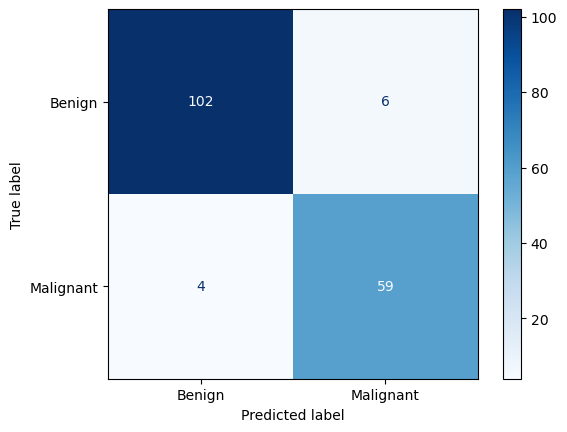

AUC score: 0.9404761904761905


/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


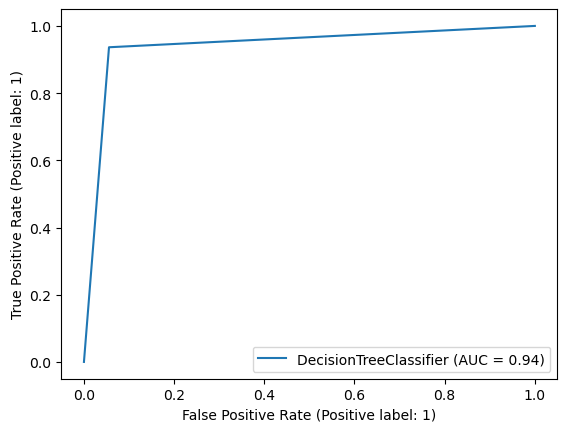

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, balanced_accuracy_score, roc_auc_score

data = pd.read_csv('breast-cancer.csv')

X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].map({'M':1,'B':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree classifier with default parameters
clf = DecisionTreeClassifier(random_state = 1)
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Print the accuracy, F1 score, precision, recall, balanced accuracy, and confusion matrix of the classifier
print("Accuracy:", clf.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:")
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# Calculate and print AUC score
auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC score:", auc_score)

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()

